In [95]:
#import all libraries and datasets provided 
import pandas as pd 
import numpy as np
train1 = pd.read_csv('batadal.csv')
train2 = pd.read_csv('BATADALtrain.csv')
test = pd.read_csv('BATADAL_test_dataset.csv')

#reorder the dataset, selecting only the sensors and the singals
train1 = train1.iloc[:,1:44]
train2 = train2.iloc[:,1:44]
test = test.iloc[:,1:44]



In [96]:
#normalize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train1)
X_train_nom = scaler.transform(train1)
#print 'mean:',X_train_nom.mean(axis=0) #inspect the mean and the variance
#print 'variance:', X_train_nom.std(axis=0)

In [97]:
#compute the eigen values that help determine the number of components that go into the PCA 
# function of deciding the number of eigenvalue to use for PCA
def percentage2n(eigVals,percentage):  
    sortArray=np.sort(eigVals)   
    sortArray=sortArray[-1::-1]   
    arraySum=sum(sortArray)  
    tmpSum=0  
    num=0  
    for i in sortArray:  
        tmpSum+=i  
        num+=1  
        if tmpSum>=arraySum*percentage:  
            return num,sortArray

In [98]:
# find the number of eigenvalue
#print n components 
#print eigen values  
covMat=np.cov(X_train_nom,rowvar=0)
eigVals,eigVects=np.linalg.eig(np.mat(covMat)) 
num,sortArray = percentage2n(eigVals,0.99)
print ('Number of principle component:',num)    
print ('array of eigenvalue:',sortArray )       # variance

Number of principle component: 15
array of eigenvalue: [7.73880163e+00 4.81738519e+00 4.60975503e+00 3.59198956e+00
 2.59716191e+00 2.43398357e+00 1.99933262e+00 1.99388799e+00
 1.53114630e+00 1.16955790e+00 9.23926257e-01 8.84997095e-01
 6.71067185e-01 5.43107776e-01 2.63363186e-01 1.04771232e-01
 3.93624696e-02 2.83612156e-02 2.38967620e-02 1.46386292e-02
 9.12329242e-03 7.42142144e-03 2.42577247e-03 1.91759825e-03
 1.01347477e-03 5.44403134e-04 3.05990281e-04 2.96699289e-04
 1.98771459e-04 1.95000329e-04 1.12080398e-04 6.04850875e-05
 1.04826089e-06 2.35440448e-08 8.64833415e-10 2.50102090e-10
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [99]:
# define the function of PCA. return the reconstructed data and principle eigenvectors.
def pca(newData,n):   
    covMat=np.cov(newData,rowvar=0)    #calculate covariance matrix  
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))  
    eigValIndice=np.argsort(eigVals)             
    n_eigValIndice=eigValIndice[-1:-(n+1):-1]    
    n_eigVect=eigVects[:,n_eigValIndice]         
    lowDDataMat=newData*n_eigVect                
    reconMat=(lowDDataMat*n_eigVect.T)  #reconstructed data 
    return n_eigVect,reconMat

In [100]:
#call function pca with required dattset 
P,X_train_rec = pca(X_train_nom,num)

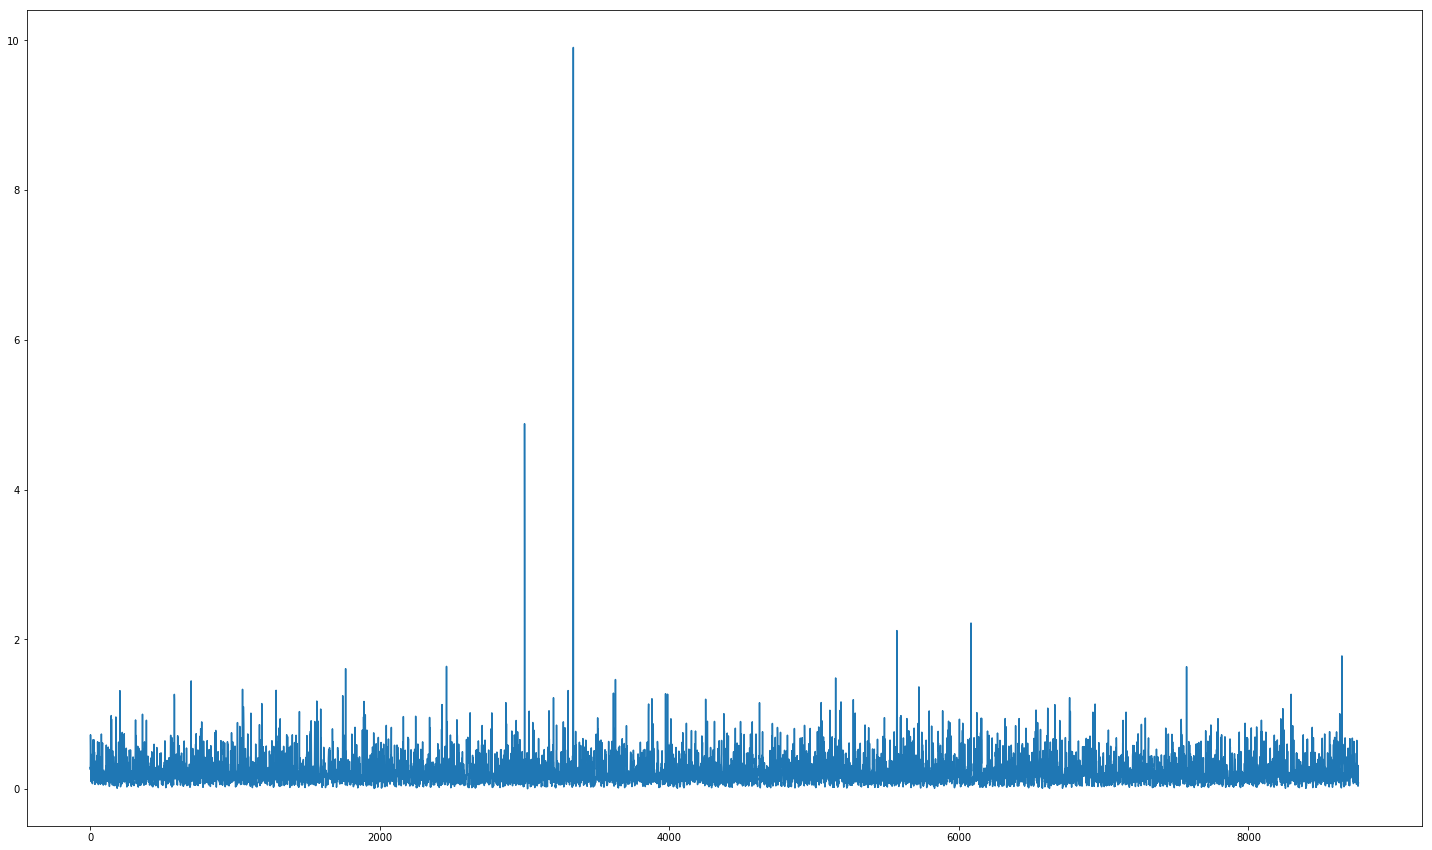

In [101]:
#compute the residuals that are being obtained 
#computation is original - recovered
import matplotlib.pyplot as plt
%matplotlib inline
residual_pca1 = X_train_nom - X_train_rec
residual_pca2 = np.square(residual_pca1)
residual_pca = residual_pca2.sum(axis=1) 
#plot the residuals to observe the pattern 
figure, ax = plt.subplots(figsize=[25,15])
plt.figure(figsize=[25,10])
ax.plot(residual_pca)

In [102]:
#a new dataset with the removed anomalies is now read 
#kindly use only batadal1.csv for this cell
train_anomaly = pd.read_csv('batadal1.csv')
train_anomaly = train_anomaly.iloc[:,1:44]

In [103]:
#first, we need to normalize the input matrix (zero mean and unit variance)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_anomaly)
X_train_nom = scaler.transform(train_anomaly)
print ('mean:',X_train_nom.mean(axis=0))
print ('variance:',X_train_nom.std(axis=0))

mean: [ 6.53176775e-17 -1.41994951e-17  1.50971061e-16  6.17880888e-16
 -3.38252259e-17  3.82635823e-15  8.60083704e-17 -8.44869960e-16
  0.00000000e+00  3.85820567e-16 -1.25969807e-16  0.00000000e+00
  0.00000000e+00 -3.86429117e-17  6.74476018e-17  0.00000000e+00
  0.00000000e+00 -2.23134923e-17 -2.43419916e-17  1.95826251e-16
 -9.63030044e-17 -1.80992850e-16  8.92032568e-17  0.00000000e+00
  0.00000000e+00  7.16060254e-17 -1.76885139e-16  5.47694812e-18
  1.62279944e-17  5.43637813e-17 -5.47694812e-17  6.56718535e-14
 -6.94355311e-16  1.28606856e-15  4.75277387e-16  7.01252209e-16
 -1.94238951e-15 -3.35716635e-16 -1.20873202e-15 -4.14828107e-17
  1.65444403e-15  1.47735604e-15  1.55180197e-15]
variance: [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [104]:
# find the number of eigenvalue
covMat=np.cov(X_train_nom,rowvar=0)
eigVals,eigVects=np.linalg.eig(np.mat(covMat)) 
num,sortArray = percentage2n(eigVals,0.99)
print ('number of principle component:',num)     # 6 principle component
print ('array of eigenvector:',sortArray) # variance



number of principle component: 15
array of eigenvector: [7.73665021e+00 4.81697799e+00 4.60933834e+00 3.59294038e+00
 2.59890317e+00 2.43433647e+00 1.99754228e+00 1.99425515e+00
 1.53256028e+00 1.17066432e+00 9.24240765e-01 8.84842108e-01
 6.71360335e-01 5.43367527e-01 2.63722442e-01 1.04662488e-01
 3.93436710e-02 2.83857019e-02 2.38785637e-02 1.46201619e-02
 9.12410205e-03 7.42316420e-03 1.91873104e-03 1.01279524e-03
 5.44765672e-04 3.30215466e-04 3.02221973e-04 2.96104007e-04
 1.98779593e-04 1.94611037e-04 1.12080027e-04 6.04898068e-05
 1.04857578e-06 2.34809649e-08 8.64910616e-10 2.49256219e-10
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [105]:
## only use the smallest non-zero eigenvalue as we need to only consider the residuals. 
P,X_train_rec = pca(X_train_nom,num)

In [106]:
#calculate the threshold, according to the paper "Diagnosing Network-Wide Traffic Anomalies"
lambda1 = sortArray
lambda2 = np.power(sortArray,2)
lambda3 = np.power(sortArray, 3)

fi1 = sum(lambda1[num:])
fi2 = sum(lambda2[num:])
fi3 = sum(lambda3[num:])
h0 = 1-2.0*fi1*fi3 /(3*(fi2**2))
Ca=2.99
threshold = fi1 * np.power(1.0 * Ca * np.sqrt(2* fi2 * (h0 ** 2)) / fi1
                           + 1 + 1.0 * fi2 * h0 * (h0-1) / (fi1 ** 2) , 1.0 / h0)
print (fi1,fi2,fi3,h0,threshold)

0.23240971941024277 0.014235582100761519 0.0012481876298108415 0.045683482571124534 1.4630271525834049


percentage of Abnormal data in training data: [[0.00102775]]


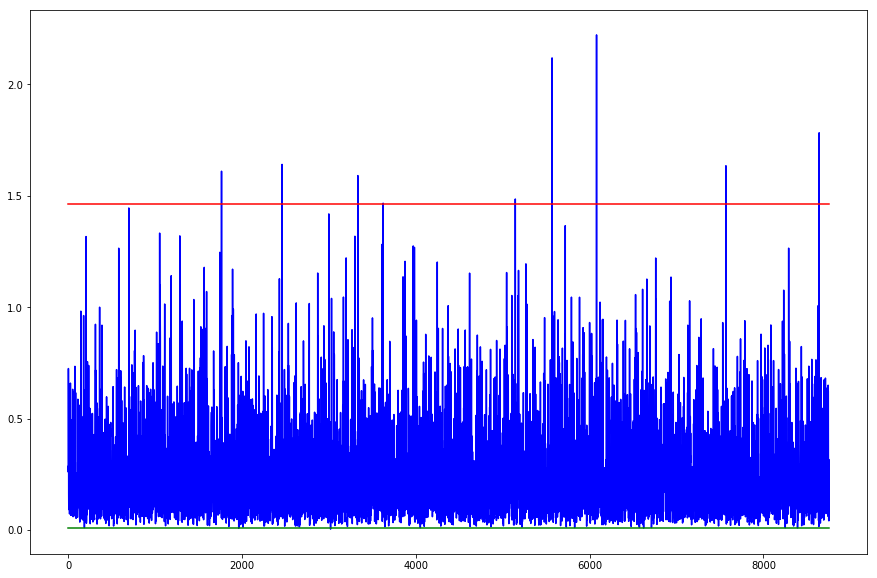

In [107]:
#recompute residuals and estimate the threshold values.
residual_pca1 = X_train_nom - X_train_rec
residual_pca2 = np.square(residual_pca1)
residual_pca = residual_pca2.sum(axis=1) 

figure, ax = plt.subplots(figsize=[15,10])
plt.figure(figsize=[25,10])
ax.plot(residual_pca,'b')
ax.plot([0,len(residual_pca)],[threshold,threshold],'r')
ax.plot([0,len(residual_pca)],[0.009,0.009],'g')
print ('percentage of Abnormal data in training data:', 1.0 * sum(residual_pca>threshold)/len(residual_pca))
#according to paper it is ok to have upto 0.2% abnormal data in the training set 

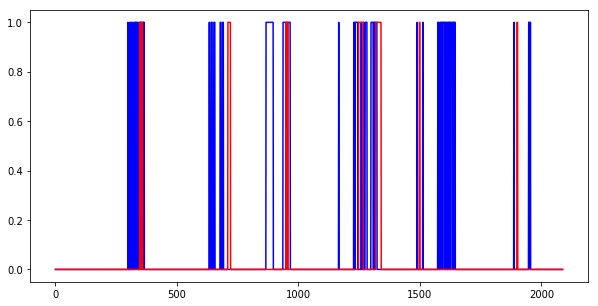

In [115]:
#test original lables with predicted lables
X_test_nom = scaler.transform(test) # apply the same normalization with training data
lowDDataMat_test=X_test_nom*P       # apply the same pca with training data
reconMat_test=(lowDDataMat_test*P.T)
residual_test1 = X_test_nom-reconMat_test
residual_test2 = np.square(residual_test1)
residual_test = residual_test2.sum(axis=1) 

figure, ax = plt.subplots(figsize=[10,5])
ax.plot(residual_test>threshold,'b')# plot the predicted label
y_test = pd.read_csv('y_test.csv')
ax.plot(1*y_test.values,'r')# plot the true label

In [109]:
residual_test = np.array(residual_test).reshape([1,2089])[0]

In [110]:
#prediction of tp, tn , fp, fn 
predict_y = residual_test > threshold
np.shape(predict_y)
#y_test = np.array(y_test)
np.shape(y_test)
print(predict_y)
np.savetxt('predict.txt',predict_y,fmt='%d')

[False False False ... False False False]


In [111]:
residual_test = np.array(residual_test).reshape([1,2089])[0]
threshold_1 = 0.009
predict_y = residual_test > threshold_1


In [112]:
#this dataset consists of predict_y variable from above cell and the labels present in the dataset.
pre = pd.read_csv('y_test1.csv')
tp = 2009 #count the number of anomalies + if true anomalies are also present in predicted anomalies then add 1 on every interation.
#tp = 2009 with abnormalities 
#tp = 1989 without abnormalities 
print("tp = ", tp)
fp = sum((pre.iloc[:,1]-pre.iloc[:,0]) == -1)
print("fp = ",fp)
pre_y = pre.iloc[:,1]
y_tes = pre.iloc[:,0]
tn = sum(pre_y[y_tes==0]==0)
print("tn=",tn)
fn = sum(pre_y[y_tes==1]==0)
print("fn=",fn)
print ('precision:' ,1.0 * tp/(tp+fp))
print ('recall:' ,1.0 * tp/(tp+fn))
print ('Accuracy:  ', 1.0 * (tp+tn)/(tp+fp+tn+fn))

tp =  2009
fp =  61
tn= 1746
fn= 61
precision: 0.9705314009661836
recall: 0.9705314009661836
Accuracy:   0.9685323703894764


In [113]:
residual_test = np.array(residual_test).reshape([1,2089])[0]
threshold_1 = 1.47
predict_y = residual_test > threshold_1
np.savetxt('predict_thres.txt',predict_y,fmt='%d')
# the data from txt file is copied and added to the y_test.csv file manually.

In [114]:
#pca after removing abnormalities 
pre = pd.read_csv('y_test2.csv')

tp =  1989 
print("tp = ", tp)
fp = sum((pre.iloc[:,1]-pre.iloc[:,0]) == -1)
print("fp = ",fp)
pre_y = pre.iloc[:,1]
y_tes = pre.iloc[:,0]
tn = sum(pre_y[y_tes==0]==0)
print("tn=",tn)
fn = sum(pre_y[y_tes==1]==0)
print("fn=",fn)
print ('precision:' ,1.0 * tp/(tp+fp))
print ('recall:' ,1.0 * tp/(tp+fn))
print ('Accuracy:  ', 1.0 * (tp+tn)/(tp+fp+tn+fn))

tp =  1989
fp =  61
tn= 1746
fn= 61
precision: 0.9702439024390244
recall: 0.9702439024390244
Accuracy:   0.968369198859217
